# EGRMGMT 590.10 Homework 5

*Due at 6:15pm ET on Thursday, March 28*

## Instructions

+ There are 12 exercises in total. Exercise 1 through 7 require coding. Your grades are based on the accuracy of the results, not the code execution speed.
  + Exercise 1, 2, and 7: each is worth 1 point.
  + Exercise 3, 4, 6, and 8 to 12: each is worth 0.5 points. 
  + Exercise 5: 3 points. 
+ Exercises are dependent on prior exercises. Please work on them in the pre-determined order.
+ Submit the .ipynb file to Sakai before 6:15pm ET on Thursday, March 28.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, March 28.

## Dataset

**Dataset Information:**

We'll be working on a dataset containing 2000 samples of the wireless signal strengths of 7 routers set up in a bounded indoor space. The signal strengths are observed on a smartphone and can be used to determine the user location.

+ Each of the first 7 columns corresponds to the strengths of signals received from one of the 7 routers. 
+ The last column corresponds to one of the four rooms in the indoor experimentation space.

**Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization

## Exercises

### Exercise 1 

+ Read the data from its URL (https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt) to a pandas DataFrame df
+ Rename the columns of df using a list ['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7', 'Location']
+ Split df into training, validation, and testing datasets using a 14:3:3 ratio
+ Build a decision tree model (*hint: sklearn's DecisionClassifier*) using the training dataset to predict the user location based on the wireless signal strengths
+ Visualize the decision tree structure. No need to build from scratch.
+ Apply the decision tree model to the validation dataset and calculate the resulting accuracy rate

The accuracy Rate for the decision tree is 0.98


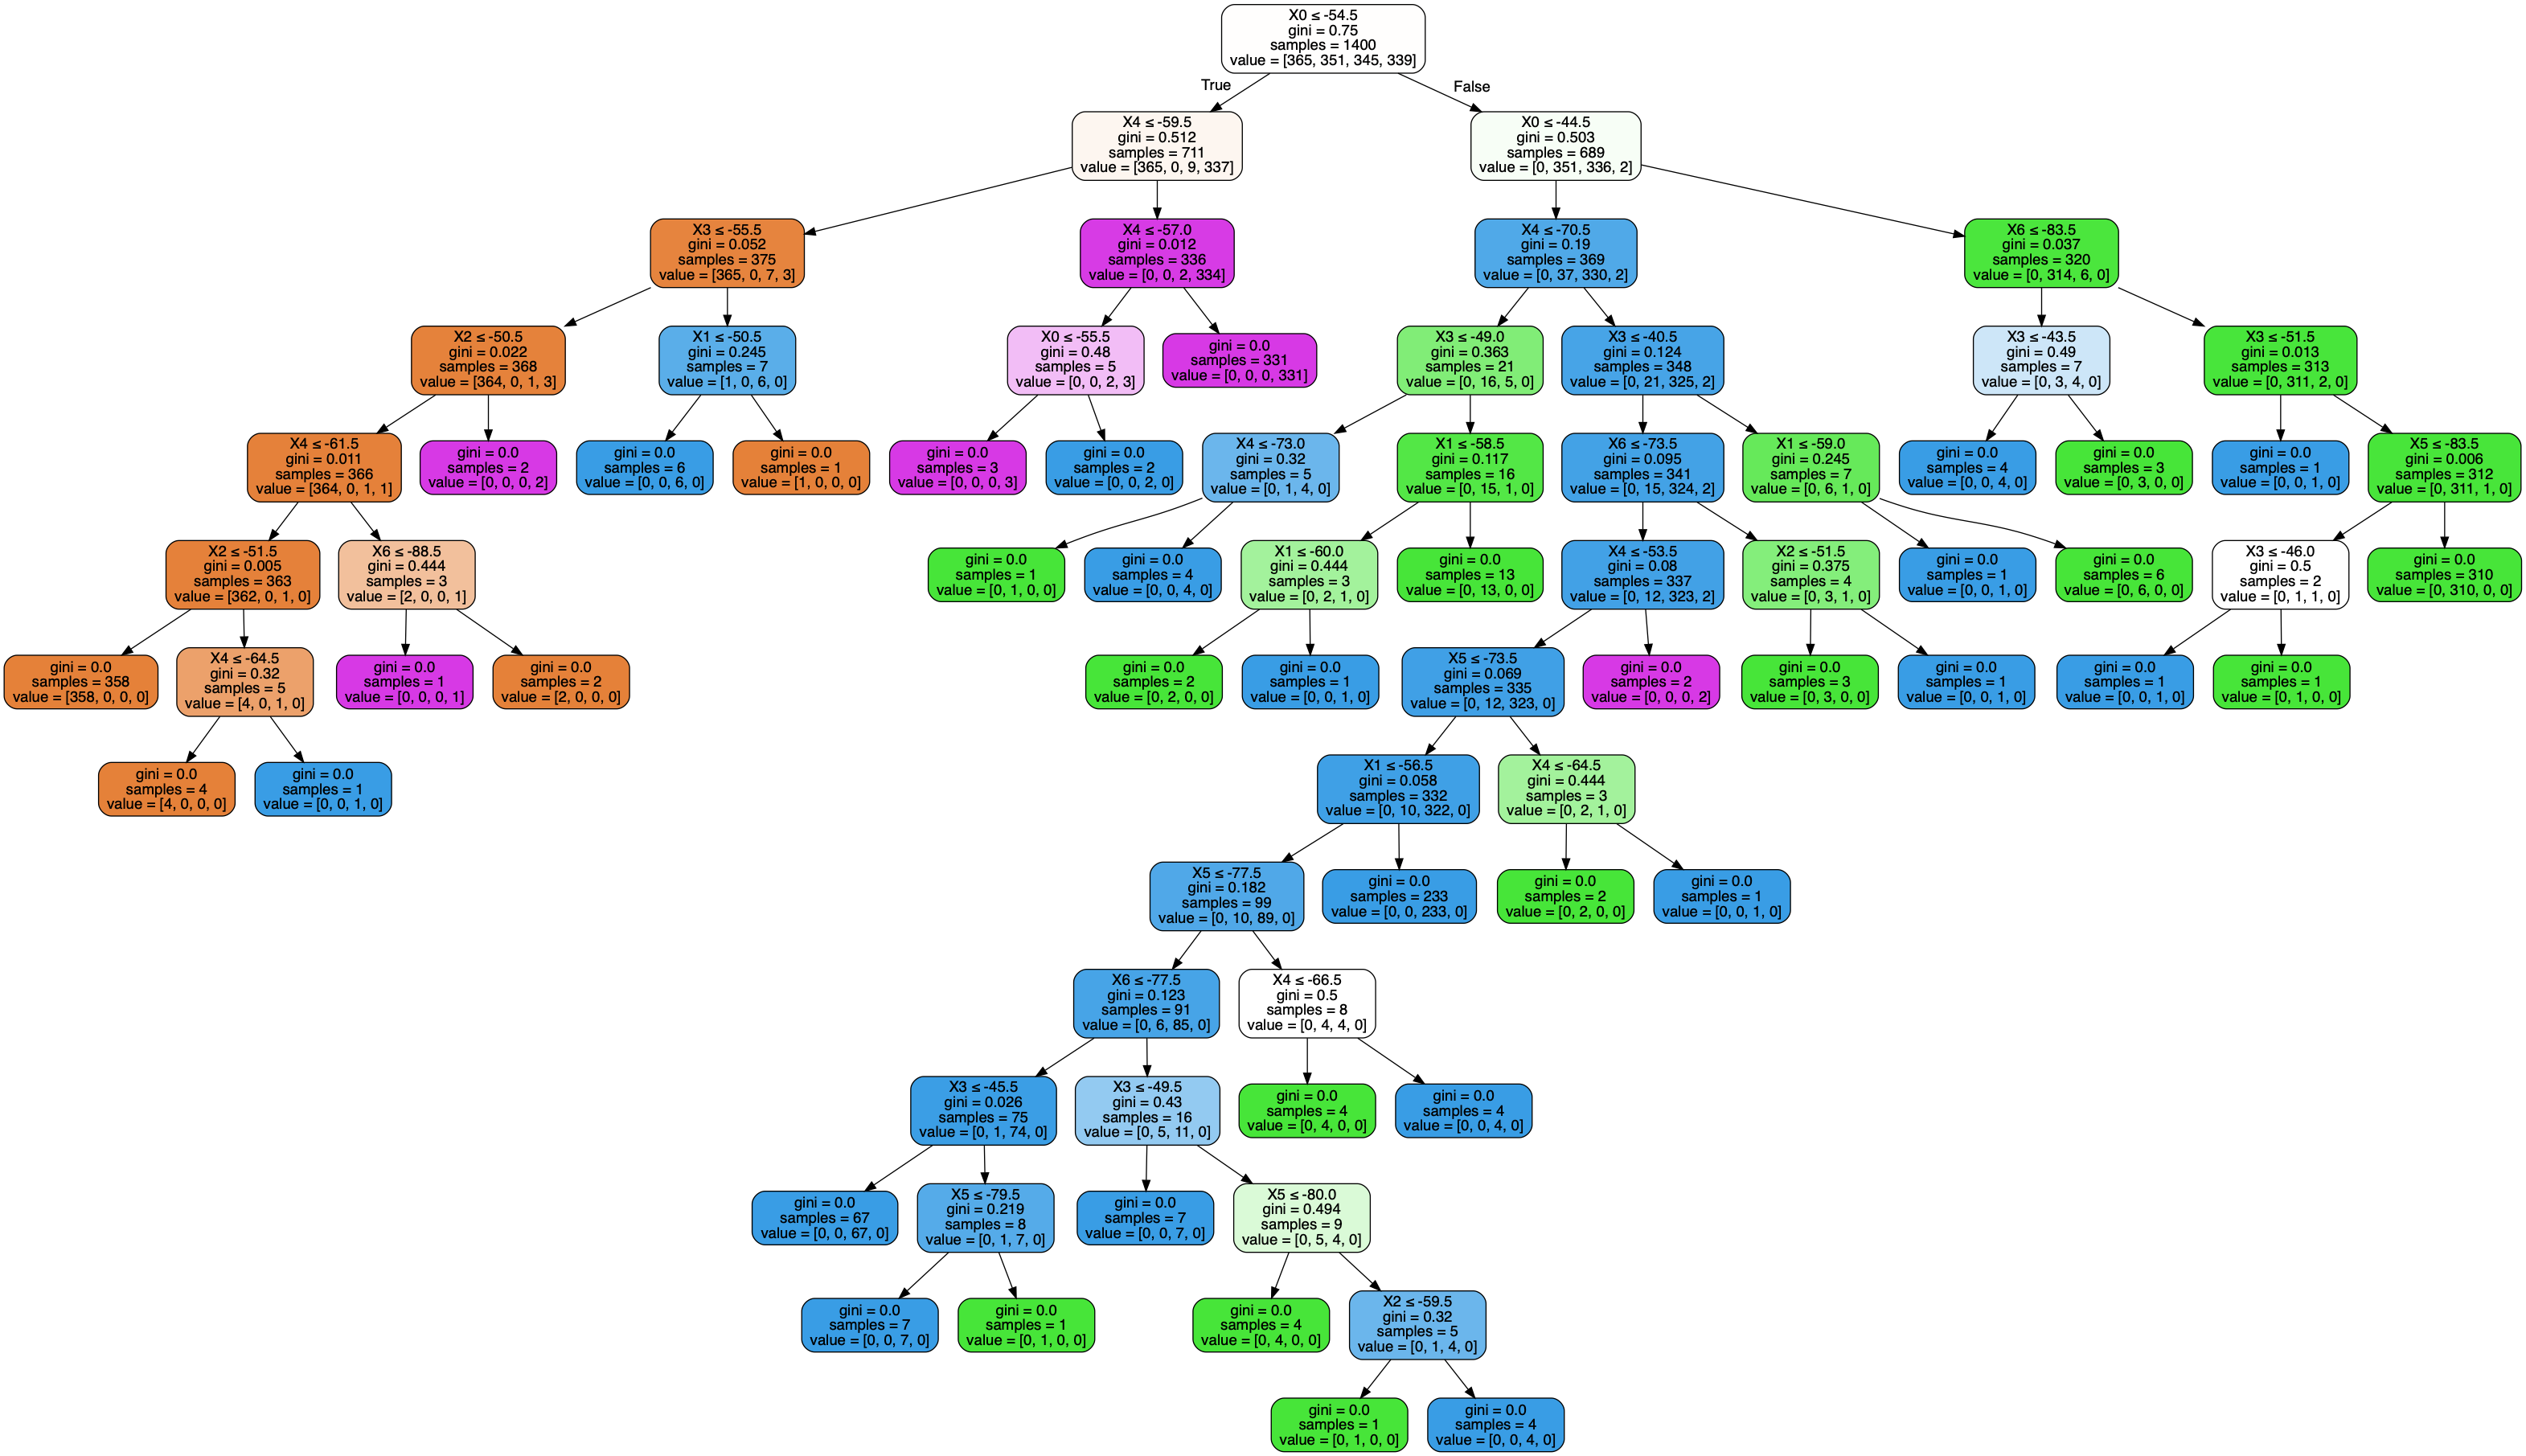

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import metrics
np.random.seed(42)
df=pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt', header=None)
df.columns=['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7', 'Location']
X=df.iloc[:,0:7]
y=df.Location
train,validate,test=np.split(df.sample(frac=1), [int(.7*len(df)), int(.85*len(df))])
"""X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=42)"""
X_train=train.iloc[:,0:7]
y_train=train.Location
X_val=validate.iloc[:,0:7]
y_val=validate.Location
X_test=test.iloc[:,0:7]
y_test=test.Location
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
print("The accuracy Rate for the decision tree is " +str(clf.score(X_val,y_val)))
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Exercise 2

+ Create a bar chart to visualize the relative importance by feature based on the decision tree model built in exercise 1
+ Features in the chart are sorted in descending order of their importance

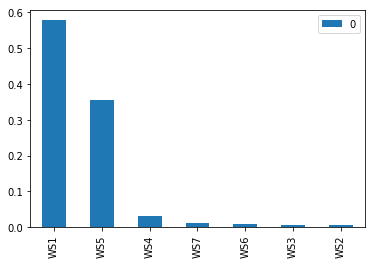

In [3]:
a=pd.DataFrame(clf.feature_importances_)
a.index=['WS1','WS2','WS3','WS4','WS5','WS6','WS7']
a=a.sort_values(0)
a=a.iloc[::-1]
a.plot.bar()

### Exercise 3

+ Build a random forest classifier (*hint: sklearn's RandomForestClassifier*) using the training dataset and find a set of the top-performing parameters (e.g. max_depth, max_features, min_samples_split, min_samples_leaf and n_estimators) via a random search with a 5-fold cross-validation
+ Apply the random forest classifier with the best parameters identified to the validation dateset prepared in exercise 1 and calculate the resulting accuracy rate

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state = 42,warm_start=True,oob_score=True)
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 2000)]
max_features  = list(range(1,X_train.shape[1]))
max_depth = [int(x) for x in np.linspace(start=1,stop=32,num=32)]
min_samples_splits = np.linspace(0.1, 1, 100, endpoint=True)
min_samples_leafs = np.linspace(0.1,0.5,50,endpoint=True)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_splits,
               'min_samples_leaf': min_samples_leafs,}



rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_estimator_)
best_random = rf_random.best_estimator_
print("\n The accuracy rate for random forest is " +str(best_random.score(X_val,y_val)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.7s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=26, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1163265306122449,
            min_samples_split=0.17272727272727273,
            min_weight_fraction_leaf=0.0, n_estimators=142, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

 The accuracy rate for random forest is 0.9633333333333334


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.8s finished


### Exercise 4

+ Refit the random forest model on the training dataset using the best parameters identified in exercise 3
+ Compute the accuracy rate for the out-of-bag instances

In [7]:
from sklearn.metrics import accuracy_score
rf1=best_random.fit(X_train,y_train)
print("the accuracy rate of OOB is " + str(rf1.oob_score_))

the accuracy rate of OOB is 0.97


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


### Exercise 5

+ Create four separate functions to calculate the entropy, gini impurity, and misclassification error respectively for any given node in a binary decision tree classifier
+ Each function has a single input argument, i.e. the percentage of instances that belong to one of the two classes
+ Create a multiline chart to compare the values of entropy, gini impurity, and misclassification error across the probability range of [0,1]

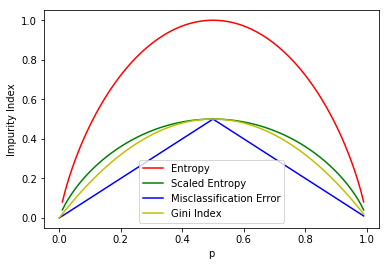

In [13]:
import matplotlib.pyplot as plt

def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def misclassification(p):
    return 1 - np.max([p, 1 - p])

def scaled_ent(p):
    return p*0.5

def apply(scaled_ent1,ent,c_err):
    ent = [entropy(p) if p != 0 else None for p in x]
    scaled_ent1 = [scaled_ent(e) if e else None for e in ent]
    c_err = [misclassification(i) for i in x]
    return scaled_ent1, ent ,c_err

x = np.arange(0.0, 1.0, 0.01)
scaled_ent1,ent,c_err=[],[],[]
scaled_ent1,ent,c_err=apply(scaled_ent1,ent,c_err)
plt.plot(x,ent,label='Entropy',color='r')
plt.plot(x,scaled_ent1,label='Scaled Entropy',color='g',)
plt.plot(x,c_err,color='b',label='Misclassification Error')
plt.plot(x,gini(x),color='y',label='Gini Index')
plt.legend(loc='best')
plt.xlabel('p')
plt.ylabel('Impurity Index')
plt.show()


### Exercise 6

+ Build a gradient boosting classifier (*hint: sklearn's GradientBoostingClassifier*) using the training dataset and find a set of top-performing parameters (e.g. learning_rate, max_depth, max_features, min_samples_split, min_samples_leaf and n_estimators) via a random search with a 5-fold cross-validation
+ Apply the gradient boosting classifier with the best parameters identified to the validation dateset prepared in exercise 1 and calculate the resulting accuracy rate

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gf=GradientBoostingClassifier(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 2000)]
max_features = max_features = list(range(1,X_train.shape[1]))
max_depth = [int(x) for x in np.linspace(start=1,stop=32,num=32)]
min_samples_splits = np.linspace(0.1, 1, 100, endpoint=True)
min_samples_leafs = np.linspace(0.1,0.5,50,endpoint=True)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_splits,
               'min_samples_leaf': min_samples_leafs,}

gf_random = RandomizedSearchCV(estimator = gf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
gf_random.fit(X_train,y_train)
best_random1=gf_random.best_estimator_
print('The accuracy rate for gradient boosting is ' + str(best_random1.score(X_val,y_val)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.0min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The accuracy rate for gradient boosting is 0.9766666666666667


### Exercise 7

+ Develop an ensemble model using the blending technique, i.e.
    + apply the desicion tree, random forest, and gradient boosting models trained in exercise 1, 3, and 6 to the validation  dataset respectively and make three series of predictions for the validation dataset
    + train a new classification model, i.e. a blender, using the three series of predictions made in the previous step as input features to predict the user location. Feel free to choose an algorithm of your interest for the blender.
+ Compare the accuracy of your ensemble model with the decision tree, random forest, and gradient boosting models trained in exercise 1, 3, and 6, i.e.
    + apply your desicion tree, random forest, gradient boosting, and ensemble models to the testing dataset prepared in exercise 1 and compare the four resulting accuracy rates

In [15]:
from sklearn.neighbors import KNeighborsClassifier
y_pred=pd.DataFrame(clf.predict(X_val))
prediction=pd.DataFrame(best_random.predict(X_val))
prediction1=pd.DataFrame(best_random1.predict(X_val))
prediction2=pd.DataFrame(clf.predict(X_test))
prediction3=pd.DataFrame(best_random.predict(X_test))
prediction4=pd.DataFrame(best_random1.predict(X_test))
X_test.index=range(0,300)
df_test=pd.concat([X_test,prediction2,prediction3,prediction4],axis=1)
X_val.index=range(0,300)
df_val=pd.concat([X_val,y_pred,prediction,prediction1],axis=1)

model=KNeighborsClassifier()
model.fit(df_val,y_val)
print('The model score through decision tree on the testing dataset is ' + str(clf.score(X_test,y_test)))
print('The model score through the Random Forest on the testing dataset is ' + str(best_random.score(X_test,y_test)))
print('The model score through Gradient Boosting on the testing dataset is  ' + str(best_random1.score(X_test,y_test)))
print('The model score through the KNN in Blending on the testing dataset is ' + str(model.score(df_test,y_test)))


The model score through decision tree on the testing dataset is 0.98
The model score through the Random Forest on the testing dataset is 0.9633333333333334
The model score through Gradient Boosting on the testing dataset is  0.9933333333333333
The model score through the KNN in Blending on the testing dataset is 0.9866666666666667


### Exercise 8

If a decision tree is underfitting, should you try scaling the input features to improve the fit?

In [ ]:
"""There are no effects on the decision tree underfitting whether the input feature are scaled or not  """

### Exercise 9

What is the main difference between the hard and soft voting classifers?

In [ ]:
"""
Hard Classifiers
Aggregates the predictions of each classifier and predict the class with the most votes

Soft Classifiers
Aggregates the predictions of each classifier and predict the class with the highest class probability, 
averaged over all the classifiers"""


#Example of Hard Classifier

"""Classifier 1 predicts class A

Classifier 2 predicts class B

Classifier 3 predicts class B
"""

#Example of Soft Classifier

"""Classifier 1 predicts class A with probability 99%

Classifier 2 predicts class A with probability 49%

Classifier 3 predicts class A with probability 49%"""

### Exercise 10

Is it guaranteed that ensemble models will give better results than the underlying models? Why?

In [ ]:
"""No. Imagine that you’re fitting a model by selecting random subsets of 
the features, performing feature selection, and then averaging the prediction of the 
fitted models. Imagine further that there are a small number of good features, and 
the rest are basically noise. In that case, the models that get the good features 
will pick them, and make similar predictions, while the models that don’t will just 
pick random features and make essentially random predictions. Then you’re averaging 
the good predictions you would’ve got from a single overall fit with noise, and your accuracy suffers."""

### Exercise 11

What's the main difference between extra-trees and random forests?

In [ ]:
"""The main difference between random forests and extra trees  lies in
the fact that, instead of computing the locally optimal feature/split combination (for the random forest), 
for each feature under consideration, a random value is selected for the split (for the extra trees).
This leads to more diversified trees and less splitters to evaluate when training an extremly random forest.

"""

### Exercise 12

What's the main difference between bagging and boosting?

In [ ]:
"""Bagging (stands for Bootstrap Aggregation) is the way to decrease the variance of your prediction by
generating additional data for training from your original data set using combinations with repetitions 
to produce multi sets of the same carnality/size as your original data. By increasing the size of your 
training set you can't improve the model predictive force, but just decrease the variance, narrowly 
tuning the prediction to expected outcome.

Boosting is a an approach to calculate the output using several different models and then average 
the result using a weighted average approach. By combining the advantages and pitfalls of these 
approaches by varying your weighting formula you can come up with a good predictive force for a wider 
range of input data, using different narrowly tuned models."""